# Part 1: Data Preprocessing

Data link: https://www.kaggle.com/datasets/mirichoi0218/insurance


This project accurately predicts insurance costs as charges is the dependent variable

# Importing the libaries and datasets

In [1]:
%matplotlib inline
from pyforest import*
lazy_imports()

['import glob',
 'from sklearn.preprocessing import LabelEncoder',
 'from sklearn.model_selection import StratifiedKFold',
 'from sklearn import metrics',
 'from scipy import signal as sg',
 'import tensorflow as tf',
 'import plotly.express as px',
 'from sklearn.linear_model import Lasso',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'from sklearn.linear_model import LogisticRegression',
 'import os',
 'from sklearn.linear_model import RidgeCV',
 'import statistics',
 'import spacy',
 'from sklearn.impute import SimpleImputer',
 'import bokeh',
 'from PIL import Image',
 'from sklearn.feature_extraction.text import CountVectorizer',
 'import skimage',
 'from sklearn.linear_model import ElasticNet',
 'from sklearn.preprocessing import RobustScaler',
 'import gensim',
 'import textblob',
 'from sklearn.preprocessing import MinMaxScaler',
 'import datetime as dt',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'from sklearn.preprocessing import OneHotEnc

In [2]:
dataset =pd.read_csv('insurance_medical.csv')

<IPython.core.display.Javascript object>

# Data Exploration

In [3]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
dataset.shape

(1338, 7)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
dataset.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [7]:
len(dataset.select_dtypes(include='object').columns)

3

In [8]:
dataset.select_dtypes(include=['int64', 'float64']).columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [9]:
len(dataset.select_dtypes(include=['int64', 'float64']).columns)

4

# Statistical summary

In [10]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Group the dataset by 'sex', 'smoker, 'gender

In [11]:
dataset.groupby('sex').mean()

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


In [12]:
dataset.groupby('smoker').mean()

,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


In [13]:
dataset.groupby('region').mean()

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


# Dealing with missing values

In [14]:
dataset.isnull().values.any()

False

In [15]:
dataset.isnull().values.sum()

0

# Encoding categorical data

In [16]:
dataset.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [17]:
dataset['sex'].unique()

array(['female', 'male'], dtype=object)

In [18]:
dataset['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [19]:
dataset['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [20]:
dataset['region'].nunique()

4

In [21]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
#one hot encoding
dataset =pd.get_dummies(data=dataset, drop_first=True)

<IPython.core.display.Javascript object>

In [23]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [24]:
dataset.shape

(1338, 9)

# correlation matrix

In [25]:
dataset_2 =dataset.drop(columns='charges')

<AxesSubplot:title={'center':'correlation with the charges'}>

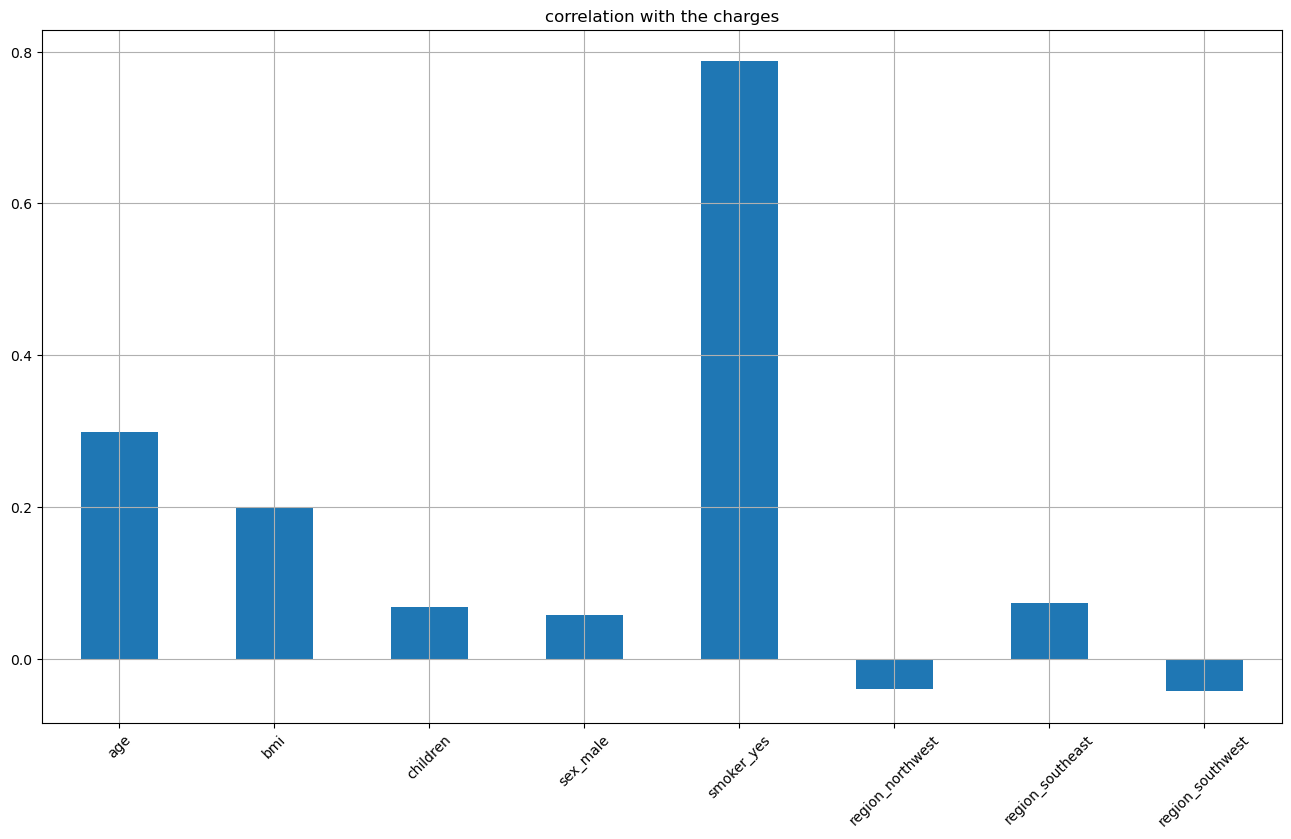

In [26]:
dataset_2.corrwith(dataset['charges']).plot.bar(
figsize=(16,9), title='correlation with the charges', rot=45, grid=True)

In [27]:
corr =dataset.corr()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

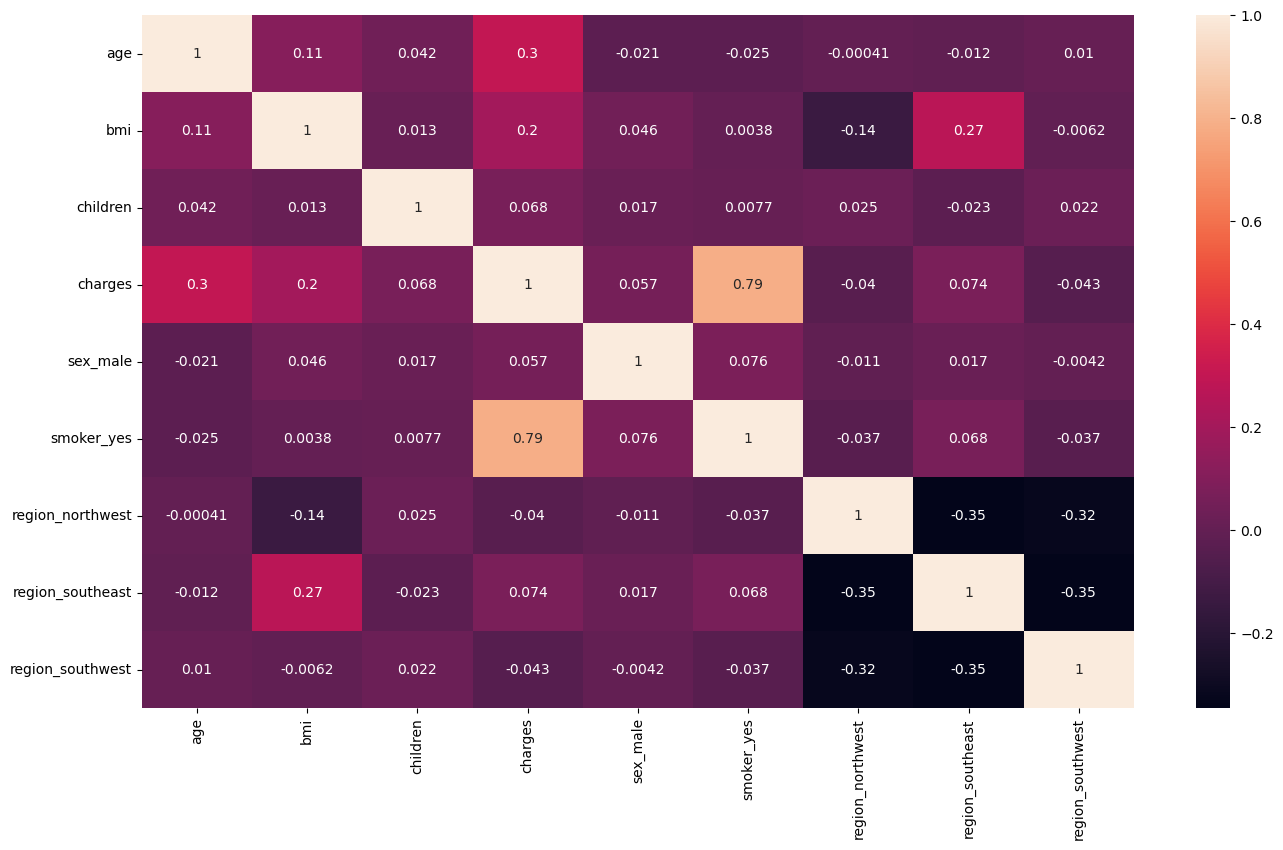

In [28]:
#heatmap
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True)

# Splitting the dataset

In [29]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [30]:
#matrix of features/Independent variables
# inplace=True as a paramenter in drop changes the values directly in the original dataFrame thus avoided here
x=dataset.drop(columns='charges')

In [31]:
#target/dependent variables
y =dataset['charges']

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=0)


In [33]:
x_train.shape

(1070, 8)

In [34]:
x_test.shape

(268, 8)

# Feature Scaling

In [35]:
#we scale because we want the independent variables that is x-values on the same scale
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
x_train =sc.fit_transform(x_train)
x_test =sc.transform(x_test)

In [36]:
x_train

array([[-0.14853305,  0.54530479,  2.41394802, ..., -0.55791981,
        -0.6155209 ,  1.70862925],
       [-1.49780784,  0.59867181, -0.89219519, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.14273553,  0.96092064,  0.76087642, ..., -0.55791981,
        -0.6155209 , -0.58526447],
       ...,
       [ 0.06451033, -0.91339361, -0.89219519, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.42679338,  0.77656186, -0.89219519, ...,  1.79237229,
        -0.6155209 , -0.58526447],
       [-0.4325909 , -1.97749955, -0.06565939, ..., -0.55791981,
        -0.6155209 ,  1.70862925]])

In [37]:
x_test

array([[ 0.91668389, -0.08539629, -0.06565939, ..., -0.55791981,
        -0.6155209 ,  1.70862925],
       [ 0.56161157, -0.21962242, -0.06565939, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [ 0.63262604,  1.59081313,  0.76087642, ...,  1.79237229,
        -0.6155209 , -0.58526447],
       ...,
       [ 1.2717562 ,  1.54472343, -0.89219519, ..., -0.55791981,
        -0.6155209 , -0.58526447],
       [-0.64563429,  1.34581001,  1.58741222, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [ 0.49059711, -0.95948331,  1.58741222, ..., -0.55791981,
        -0.6155209 , -0.58526447]])

# Part 2: Building the model

In [38]:
from sklearn.linear_model import LinearRegression
regressor_lr =LinearRegression()
regressor_lr.fit(x_train, y_train)

LinearRegression()

In [39]:
y_pred =regressor_lr.predict(x_test)

In [40]:
from sklearn.metrics import r2_score

In [41]:
r2_score(y_test, y_pred)

0.7999876970680433

# Random Forest regression

In [42]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf =RandomForestRegressor()
regressor_rf.fit(x_train, y_train)

RandomForestRegressor()

In [43]:
y_pred =regressor_rf.predict(x_test)

In [44]:
r2_score(y_test, y_pred)

0.8813784941796112

# XGBoost Regression

In [45]:
from xgboost import XGBRFRegressor
regressor_xgb =XGBRFRegressor()
regressor_xgb.fit(x_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=None,
               reg_alpha=None, ...)

In [46]:
y_pred =regressor_rf.predict(x_test)

In [52]:
r2_score(y_test, y_pred)

0.8813784941796112

# Part3: predict charges for a new customer

Example1:
    Name: Frank, age:40, bmi:45.50, children:4, smoker:1, region:northeast

In [47]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [48]:
frank_obs=[[40,45.5, 4,1,1,0,0,0]]

In [49]:
regressor_rf.predict(sc.transform(frank_obs))

C:\Users\HENRY\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([45241.5794259])

Examples2:
    Name: Sara, age:19, bmi:27.9, children:0, sex:female smoker:no, region:northwest

In [50]:
sara_obs =[[19,27.9,0,0,0,1,0,0]]

In [51]:
regressor_rf.predict(sc.transform(sara_obs))

C:\Users\HENRY\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([2231.179918])